In [110]:
import pandas as pd
import scipy as sci
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier,VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

In [111]:
dataset = pd.read_csv('G:\dataanalytics\datastorm\data-storm-10\credit_card_default_train.csv')
print(len(dataset))
print(dataset.head())

24000
  Client_ID Balance_Limit_V1 Gender EDUCATION_STATUS MARITAL_STATUS  \
0        A2               1M      M         Graduate          Other   
1        A3               1M      F      High School          Other   
2        A4             100K      F      High School         Single   
3        A5             200K      F         Graduate         Single   
4        A6               1M      F         Graduate          Other   

            AGE  PAY_JULY  PAY_AUG  PAY_SEP  PAY_OCT         ...          \
0         31-45        -1       -1       -1       -1         ...           
1  Less than 30         0       -1       -1       -1         ...           
2         31-45         4        3        2        2         ...           
3         31-45         2        0        0        0         ...           
4         31-45         2        2        0        0         ...           

   DUE_AMT_OCT  DUE_AMT_NOV  DUE_AMT_DEC  PAID_AMT_JULY  PAID_AMT_AUG  \
0        39418       162772       -13

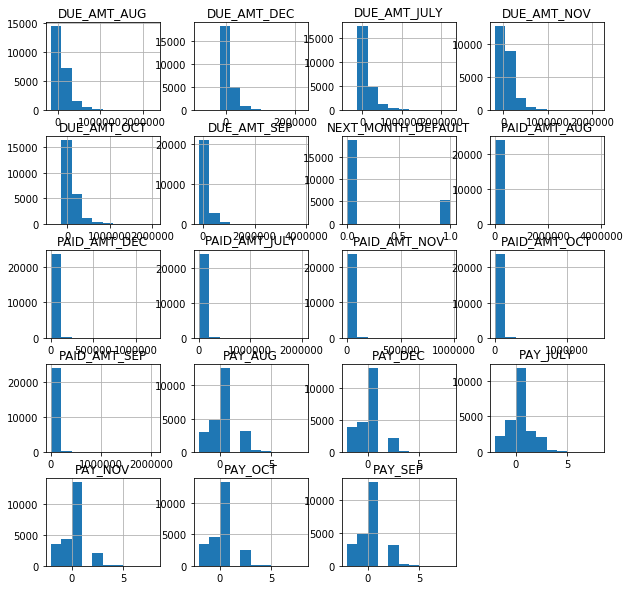

In [112]:
plt.rcParams['figure.figsize'] = (10, 10)
dataset.hist()
plt.show()

In [113]:
dataset.isna().sum()
dataset.isnull().sum()

Client_ID             0
Balance_Limit_V1      0
Gender                0
EDUCATION_STATUS      0
MARITAL_STATUS        0
AGE                   0
PAY_JULY              0
PAY_AUG               0
PAY_SEP               0
PAY_OCT               0
PAY_NOV               0
PAY_DEC               0
DUE_AMT_JULY          0
DUE_AMT_AUG           0
DUE_AMT_SEP           0
DUE_AMT_OCT           0
DUE_AMT_NOV           0
DUE_AMT_DEC           0
PAID_AMT_JULY         0
PAID_AMT_AUG          0
PAID_AMT_SEP          0
PAID_AMT_OCT          0
PAID_AMT_NOV          0
PAID_AMT_DEC          0
NEXT_MONTH_DEFAULT    0
dtype: int64

In [114]:
dataset.loc[dataset['Gender'] == "M", 'Gender'] = 0
dataset.loc[dataset['Gender'] == "F", 'Gender'] = 1
dataset.loc[dataset['EDUCATION_STATUS'] == "Graduate", 'EDUCATION_STATUS'] = 1
dataset.loc[dataset['EDUCATION_STATUS'] == "High School", 'EDUCATION_STATUS'] = 2
dataset.loc[dataset['EDUCATION_STATUS'] == "Other", 'EDUCATION_STATUS'] = 3
dataset.loc[dataset['MARITAL_STATUS'] == "Other", 'MARITAL_STATUS'] = 1
dataset.loc[dataset['MARITAL_STATUS'] == "Single", 'MARITAL_STATUS'] = 2
dataset.loc[dataset['AGE'] == "Less than 30", 'AGE'] = 1
dataset.loc[dataset['AGE'] == "31-45", 'AGE'] = 2
dataset.loc[dataset['AGE'] == "46-65", 'AGE'] = 3
dataset.loc[dataset['AGE'] == "More than 65", 'AGE'] = 4

In [115]:
dataset.insert(2,'Balance_Limit_V1_2',dataset['Balance_Limit_V1'].str.strip().str[-1])
dataset.insert(3,'Balance_Limit_V1_1',dataset['Balance_Limit_V1'].str.strip(' ').str.extract('(\d*)',expand=False))
dataset['Balance_Limit_V1_1'] = pd.to_numeric(dataset['Balance_Limit_V1_1'])
dataset.loc[dataset['Balance_Limit_V1_2'] == "M",['Balance_Limit_V1_1']]*=1000000
dataset.loc[dataset['Balance_Limit_V1_2'] == "K",['Balance_Limit_V1_1']]*=1000

In [116]:
#dataset.insert(5,'Edu_Gen', (dataset['EDUCATION_STATUS'] + dataset['Gender']))
#dataset['Edu_Gen'] = dataset['EDUCATION_STATUS'] + dataset['Gender']

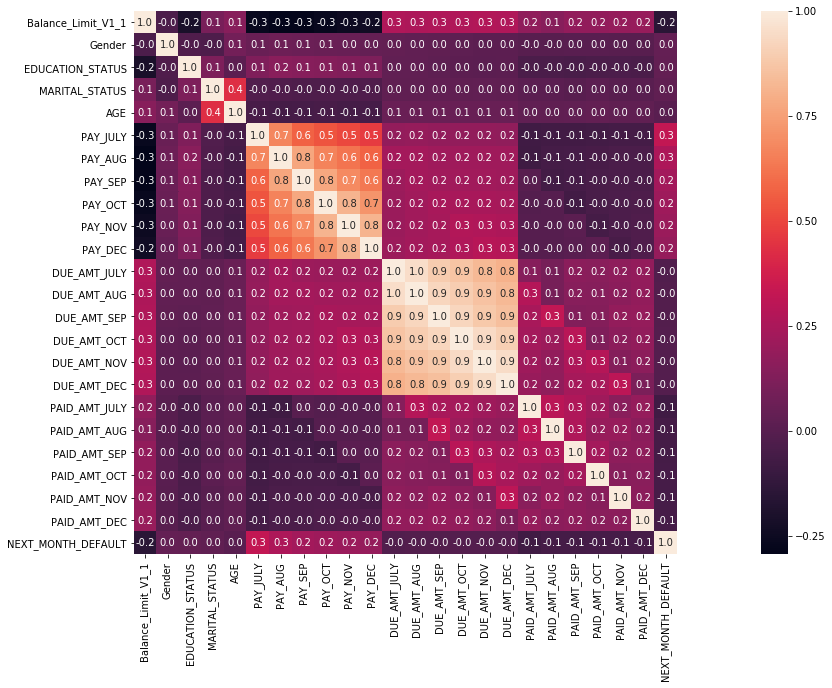

In [117]:
corr = dataset.corr()
plt.subplots(figsize=(30,10))
sns.heatmap( corr, square=True, annot=True, fmt=".1f" ) 

In [118]:
dataset.insert(5,'Average_DUE_AMT_JtoD',(dataset.DUE_AMT_JULY+dataset.DUE_AMT_AUG+dataset.DUE_AMT_SEP+dataset.DUE_AMT_OCT+dataset.DUE_AMT_NOV+dataset.DUE_AMT_DEC)/6)

In [119]:
dataset = dataset.drop('Client_ID',axis=1)
dataset = dataset.drop('Balance_Limit_V1',axis=1)
#dataset = dataset.drop('Balance_Limit_V1_1',axis=1)
dataset = dataset.drop('Balance_Limit_V1_2',axis=1)
dataset = dataset.drop('AGE',axis=1)
dataset = dataset.drop('Gender',axis=1)
#dataset = dataset.drop('PAY_JULY',axis=1)
#dataset = dataset.drop('PAY_AUG',axis=1)
#dataset = dataset.drop('PAY_SEP',axis=1)
#dataset = dataset.drop('PAY_OCT',axis=1)
#dataset = dataset.drop('PAY_NOV',axis=1)
#dataset = dataset.drop('PAY_DEC',axis=1)
#dataset = dataset.drop('EDUCATION_STATUS',axis=1)
#dataset = dataset.drop('PAID_AMT_JULY',axis=1)
#dataset = dataset.drop('DUE_AMT_JULY',axis=1)
#dataset = dataset.drop('PAID_AMT_AUG',axis=1)
#dataset = dataset.drop('DUE_AMT_AUG',axis=1)
#dataset = dataset.drop('PAID_AMT_SEP',axis=1)
#dataset = dataset.drop('DUE_AMT_SEP',axis=1)
#dataset = dataset.drop('PAID_AMT_OCT',axis=1)
#dataset = dataset.drop('DUE_AMT_OCT',axis=1)
#dataset = dataset.drop('PAID_AMT_NOV',axis=1)
#dataset = dataset.drop('DUE_AMT_NOV',axis=1)
#dataset = dataset.drop('PAID_AMT_DEC',axis=1)
#dataset = dataset.drop('DUE_AMT_DEC',axis=1)
#dataset = dataset.drop('Average_DUE_AMT_JtoD',axis=1)

In [120]:
print(len(dataset.columns))

23


In [121]:
x = dataset.iloc[:,0:22]
y = dataset.iloc[:,22]
x_train, x_test, y_train,y_test = train_test_split(x,y,random_state=0, test_size=0.2)

In [122]:
xgb_model = xgb.XGBClassifier(learning_rate =0.0005,
    n_estimators=250,
    max_depth = 5,
    min_child_weight = 1,
    gamma=0.01,
    subsample=0.45,
    colsample_bytree=0.9,
    reg_alpha=1,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=0)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_train)
print("Training Accuracy :",accuracy_score(y_train, y_pred))
y_pred = xgb_model.predict(x_test)
print("Testing Accuracy :",accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy : 0.8252604166666667
Testing Accuracy : 0.8214583333333333
             precision    recall  f1-score   support

          0       0.84      0.95      0.89      3739
          1       0.68      0.36      0.47      1061

avg / total       0.80      0.82      0.80      4800



C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
